# Mobile Games A/B Testing - Cookie Cats

1. [Introduction](#introduction)  
1.1. [Objectives](#objectives)  
1.2. [Requirements](#requirements)  
1.3. [Dataset](#dataset)  

2. [Data Preparation](#data)  
2.1. [Imports](#imports)  
2.2. [Loading data](#loading_data)  
2.3. [Data cleaning](#data_cleaning)  
2.4. [Exploratory Data Analysis (EDA)](#edi)  

3. [A/B Test: Evaluating the Effectiveness of Game Versions on Retention Time](#ab_chi2)  
3.1. [Chi-Square Test](#chi2)  
3.2. [Assumptions for Chi-squared Test](#chi2_assumptions)  
3.3. [Results for Chi-squared Test](#chi2_results)  
3.4. [Confidence Interval for Proportions (Analytical Method)](#chi2_ci_a)  
3.5. [Confidence Interval for Proportions (Bootstrap Method)](#chi2_ci_b)  

4. [A/B Test: Evaluating the Effectiveness of Game Versions on Sum of Gamerounds](#ab_ttest)  
4.1. [t-Test](#ttest)  
4.2. [Assumptions of the t-Test](#ttest_assumptions)  
4.3. [Two-Sample t-Test for Game Rounds Played](#ttest_results)  
4.4. [Analytical Confidence Interval Calculation](#ttest_ci_a)  
4.5. [Bootstrap Confidence Interval Calculation](#ttest_ci_b)  

5. [Conclusion](#conclusion)  

<a id="introduction"></a>
# 1. Introduction

<a id="objectives"></a>
## 1.1. Objectives

In this project, the goal is to analyze the results of an A/B test conducted by the creators of the **Cookie Cats** mobile game. This will provide an opportunity to explore experimental data, perform statistical analysis, and derive actionable insights. The specific objectives are:

- **Identify and handle outliers**: Learn to detect and remove extreme outliers to improve the accuracy and reliability of statistical analysis.
- **Understand the relationship between gameplay and retention**: Explore how retention metrics on Day 1 and Day 7 are related to gameplay behavior, specifically the total number of game rounds played.
- **Evaluate differences between groups using multiple tests**: Use Chi-Square and t-tests to assess group differences and interpret their practical significance.
- **Provide actionable recommendations**: Develop a data-driven recommendation based on statistical and exploratory analysis, considering the potential negative impacts on retention.
- **Practice analyzing experiments**: Gain hands-on experience in analyzing A/B test data from a real-world scenario.
- **Practice conducting statistical tests and calculating confidence intervals**: Apply statistical tests such as t-tests and bootstrap methods to evaluate the differences between groups, and calculate confidence intervals to assess the reliability of the results.
- **Practice communicating results of an A/B test**: Develop the ability to interpret and present statistical findings in a clear and actionable manner.
- **Practice creating visualizations**: Use visualizations like histograms, boxplots, and confidence interval charts to effectively communicate insights to stakeholders.

The analysis focuses on understanding how moving the first gate in the game from **level 30** to **level 40** affects player behavior, with metrics such as **game rounds played** and **retention rates** as key indicators.

<a id="requirements"></a>
## 1.2. Requirements

Your task is to analyze the **Cookie Cats A/B Test** dataset. The analysis will be performed in a Jupyter notebook, following the structure outlined below:

1. **Goal**
   - Describe the goal of the A/B test based on the dataset description provided on Kaggle. Provide any necessary context and explain why the test is being conducted. Specifically, the test investigates the impact of moving the first gate in the game from **level 30** to **level 40** on player behavior.

2. **Target Metric**
   - Choose a target metric for evaluation. Describe how the chosen metric measures progress towards the goal of the A/B test. For the **Cookie Cats A/B Test**, potential metrics include:
     - **Sum of game rounds played**: A measure of player engagement.
     - **Retention rates (1-day and 7-day)**: Indicators of long-term player engagement.

3. **Calculations**
   - **Data Aggregation and Preparation**: Aggregate the data, prepare it for analysis, and report key information about the A/B test, including:
     - Sample size (number of players in each group).
     - Proportions of each variant (`gate_30` and `gate_40`) used in the test.
   - Clean the data by addressing any outliers, missing values, or inconsistencies.

4. **Conduct Statistical Tests**
   - **Test Selection**: Describe the statistical test chosen for each metric. Justify the choice based on the data type (e.g., normality, distribution, number of groups). Common tests include:
     - **T-tests** for comparing the means of two groups (e.g., game rounds played between `gate_30` and `gate_40`).
     - **Chi-squared Tests** for comparing proportions (e.g., retention rates between the two groups).
     - **Levene's Test** to check for homogeneity of variance.
     - **Shapiro-Wilk Test** to check for normality.

5. **Report the Estimated Treatment Effect**
   - Calculate the treatment effect as the difference between the group means. For one metric (e.g., game rounds played), compute the confidence interval using both analytical and bootstrap methods. Report both intervals and discuss their implications.
     - **Confidence Interval**: A range of values that is likely to contain the true difference in means between the two groups.

6. **Decision**
   - Based on the results of the statistical tests and treatment effect calculations, describe the decision you recommend. Should the gate remain at level 30 or be moved to level 40? Justify your recommendation based on the statistical results.
   - Use **visualizations** to illustrate:
     - Differences in the target metric between groups.
     - Confidence intervals for the treatment effect.
     - Distribution of the target metric within each group.

This structure ensures a comprehensive and systematic analysis of the A/B test, providing actionable insights into the impact of the game design change.


<a id="dataset"></a>
## 1.3. Dataset: Cookie Cats A/B Test

The dataset for this project can be downloaded from Kaggle:

- **[Cookie Cats A/B Test Dataset](https://www.kaggle.com/datasets/mursideyarkin/mobile-games-ab-testing-cookie-cats)**

The **Cookie Cats A/B Test** dataset is provided by the Kaggle community. The dataset contains information about a test conducted by the developers of the Cookie Cats mobile game to evaluate the impact of changing the placement of the first gate on player engagement and retention.

### About the Dataset

Cookie Cats is a popular mobile puzzle game where players match tiles to progress through levels. During gameplay, players encounter gates that require them to wait a certain amount of time or make an in-app purchase to unlock further levels. The purpose of this test was to assess how moving the first gate from **level 30** to **level 40** affects player behavior.

### Columns

- **userid**: A unique identifier for each player.
- **version**: Indicates the group assignment of the player:
  - `gate_30`: Control group where the gate is placed at level 30.
  - `gate_40`: Treatment group where the gate is placed at level 40.
- **sum_gamerounds**: The total number of game rounds played by the player within the first 14 days after installation.
- **retention_1**: Whether the player returned to the game 1 day after installation (`True` or `False`).
- **retention_7**: Whether the player returned to the game 7 days after installation (`True` or `False`).

This dataset provides a robust foundation for evaluating how gameplay changes affect player engagement and retention, helping developers optimize the user experience and maximize player retention.


<a id="data"></a>
# 2. Data Preparation

<a id="imports"></a>
## 2.1. Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import ttest_ind
from src.utils import *

<a id="loading_data"></a>
## 2.2. Loading data 

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

file_path = ".\\data\\cookie_cats.csv"
df = pd.read_csv(file_path)
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<a id="data_cleaning"></a>
## 2.3. Data cleaning

### Check for Missing Values

In [3]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

There are no null values

### Check for Duplicates

In [4]:
df[df.duplicated()]

,userid,version,sum_gamerounds,retention_1,retention_7


There are no duplicates

### Check for Outliers
Detect and visualize outliers in the numeric columns of the dataset. This step is crucial for understanding data variability and identifying potential anomalies that may affect downstream analysis.
- The `plot_box(df, col)` function generates a boxplot for each column.
- The `find_outliers(df, col)` function displays a rows with outliers for each column.

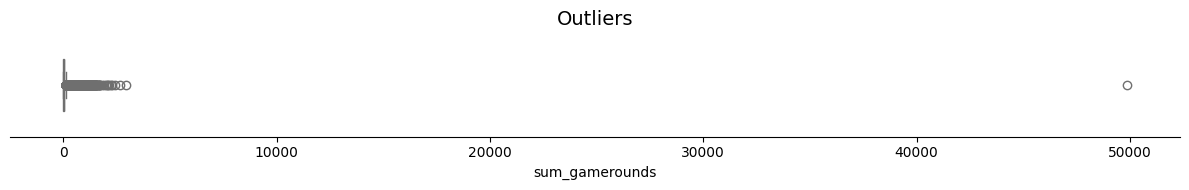

,userid,version,sum_gamerounds,retention_1,retention_7
48188,5346171,gate_40,2294,True,True
43671,4832608,gate_30,2438,True,True
29417,3271615,gate_40,2640,True,False
7912,871500,gate_30,2961,True,True
57702,6390605,gate_30,49854,False,True


In [5]:
numeric_features = ["sum_gamerounds"]

for col in numeric_features:
    plot_box(df, col)

    display(find_outliers(df, col))

During the analysis of the **sum_gamerounds** data, an extreme outlier with a value of **49,854** was identified. This value is significantly higher than the rest of the observations in the dataset, making it an apparent anomaly.

Reasons why this data point is likely an error or anomaly:

- **Data Entry Error**: Given that **49,854** game rounds is far beyond the typical player activity, it is reasonable to assume that this value could result from a data entry mistake, such as incorrect logging or a technical issue during data collection.
  
- **Impact on Analysis**: Outliers like this can significantly skew statistical analysis, particularly measures like the mean and standard deviation, and affect the results of tests such as t-tests or ANOVA. The presence of this extreme value could lead to misleading conclusions about player engagement and retention.
  
- **Lack of Realistic Context**: It is highly unlikely that a player would engage with the game to this extent, making this value inconsistent with the realistic behavior expected in the dataset.

Decision to Remove the Outlier:

In [6]:
df = df.query("sum_gamerounds != 49854")

### Check for Outliers again

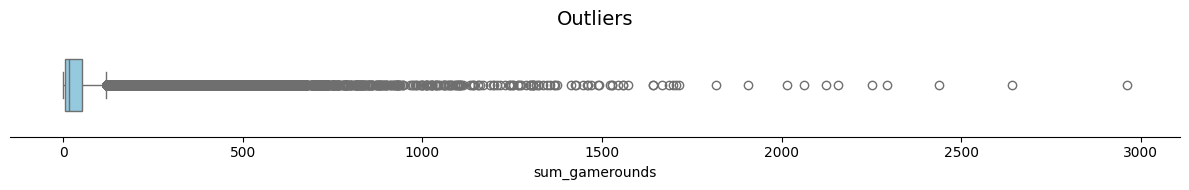

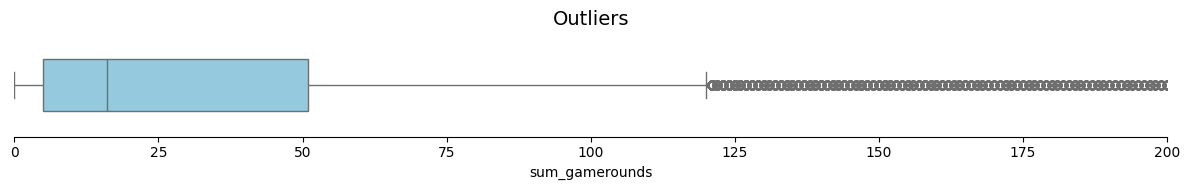

,userid,version,sum_gamerounds,retention_1,retention_7
46344,5133952,gate_30,2251,True,True
48188,5346171,gate_40,2294,True,True
43671,4832608,gate_30,2438,True,True
29417,3271615,gate_40,2640,True,False
7912,871500,gate_30,2961,True,True


In [7]:
numeric_features = ["sum_gamerounds"]

for col in numeric_features:
    plot_box(df, col)
    plot_box(df, col, xlim=(0, 200))

    display(find_outliers(df, col))

After removing the extreme outlier with the value **49,854** (which was likely a data entry error), we still observe the presence of other outliers in the dataset. However, these remaining outliers are now more consistent with the overall distribution of the data, and they fall within a more reasonable range compared to the extreme outlier.

### Check userid uniqueness

In [8]:
print(f"Data rows: {df['userid'].count()}")
print(f"Unique users {df['userid'].nunique()}")

Data rows: 90188
Unique users 90188


- **Data rows**: The total number of rows in the dataset is **90,188**, indicating the number of individual data points collected for analysis.
  
- **Unique users**: There are **90,188 unique users** in the dataset, which indicates that each user has a unique identifier, and no duplicates are present.

Since the number of unique users matches the total number of data rows, we can conclude that there are no duplicate user entries in the dataset. This does not provide addiotnal benefit to have it, so we can remove it.
Since there are no duplicate user entries, this feature `userid` does not provide additional benefit, and we can remove it.


In [9]:
df = df.drop(columns=["userid"])

<a id="edi"></a>
## 2.4. Exploratory Data Analysis (EDA)

In [10]:
num_observations, num_features = df.shape

numeric_features = ["sum_gamerounds"]
categorical_features = ["version", "retention_1", "retention_7"]

print(f"Number of df (rows): {num_observations}\n")
print(f"Number of features (columns): {num_features}\n")
print(f"Number of categorical features: {len(categorical_features)}")
print_list(categorical_features)
print(f"\nNumber of numeric features: {len(numeric_features)}")
print_list(numeric_features)

Number of df (rows): 90188

Number of features (columns): 4

Number of categorical features: 3
   - version
   - retention_1
   - retention_7

Number of numeric features: 1
   - sum_gamerounds


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90188 entries, 0 to 90188
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   version         90188 non-null  object
 1   sum_gamerounds  90188 non-null  int64 
 2   retention_1     90188 non-null  bool  
 3   retention_7     90188 non-null  bool  
dtypes: bool(2), int64(1), object(1)
memory usage: 2.2+ MB


### Generating Summary Statistics

The `df.describe()` function provides a summary of the statistical properties of the numerical columns in the dataset. It includes the following key metrics:

- **count**: The number of non-null values.
- **mean**: The average value of the column.
- **std**: The standard deviation, which indicates the spread of the data.
- **min**: The minimum value in the column.
- **25%**: The 25th percentile, which represents the value below which 25% of the data falls.
- **50%**: The median, or 50th percentile, which represents the middle value of the data.
- **75%**: The 75th percentile, which represents the value below which 75% of the data falls.
- **max**: The maximum value in the column.

In [12]:
df.describe()

,sum_gamerounds
count,90188.000000
mean,51.320253
std,102.682719
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,2961.000000


The **mean** and **median** are far away from each other for `sum_gamerounds`, indicating that the distribution is not normal. 

### Plotting Numeric Feature Distributions

In this step, we define a function `plot_numeric_distribution()` to visualize the distribution of numeric features in the dataset. The function uses Seaborn's `histplot` to create histograms with the following parameters:

- **df**: The dataset.
- **feature**: The numeric feature to be plotted.
- **bins**: The number of bins for the histogram (default is 20).
- **hue**: An optional categorical feature to color the plot by (currently commented out).
- **kde**: A Kernel Density Estimate curve is overlaid on the histogram for better visualization of the distribution.
- **multiple**: Specifies how overlapping histograms should be displayed (set to "stack").
- **edgecolor**: Adds a black edge color to each bin for clarity.

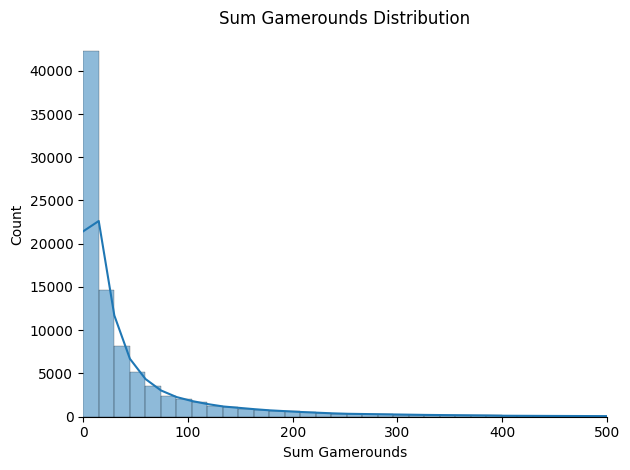

In [13]:
for feature in numeric_features:
    plot_numeric_distribution(df, feature, bins=200, xlim=(0, 500))

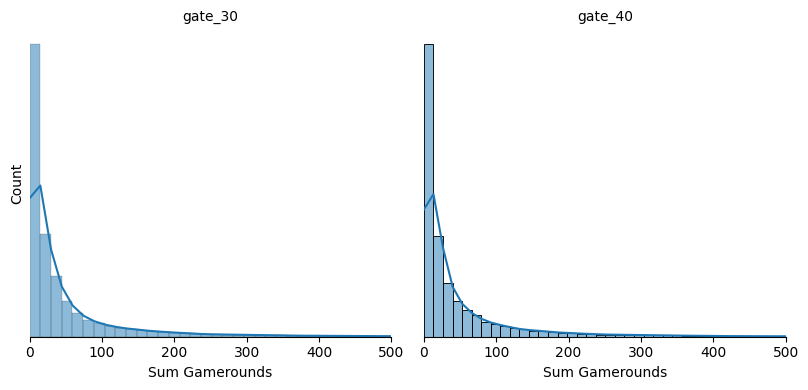

In [14]:
categorical_feature = "version"
numeric_feature = "sum_gamerounds"
subplot_numeric_distribution_with_feature(
    df, categorical_feature, numeric_feature, bins=200, xlim=(0, 500)
)

The **sum_gamerounds** represents the total number of game rounds played by a user during the first 14 days after installing the game. The distribution of **sum_gamerounds** follows an **exponential distribution**:

- **Concentration near 0**: Most of the values are concentrated around 0, indicating that a majority of users tend to play fewer rounds of the game.
- **Long tail**: The distribution ends with values approaching 3,000, showing that a smaller number of users engage in significantly more rounds, creating a right-skewed tail.
- **Similar distribution across versions**: The distributions for both **gate_30** and **gate_40** versions show similar shapes, suggesting that the change in the game (moving the gate) did not drastically alter the distribution of game rounds played.

### Analyzing Categorical Features

version:
 - Most often value: gate_40
 - Value count: 90188


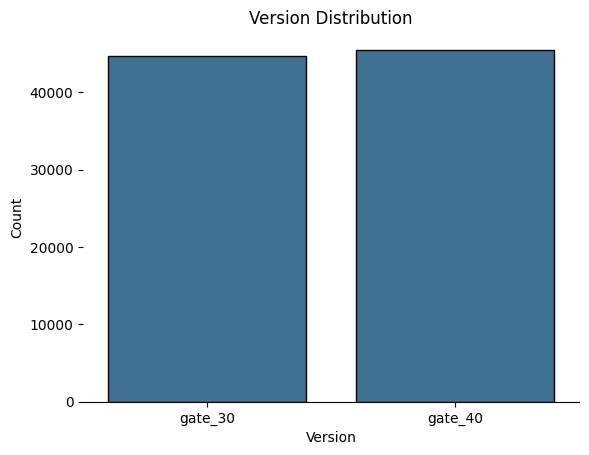

retention_1:
 - Most often value: False
 - Value count: 90188


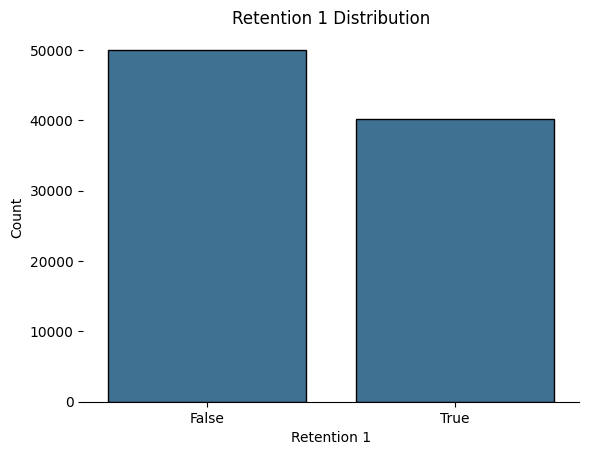

retention_7:
 - Most often value: False
 - Value count: 90188


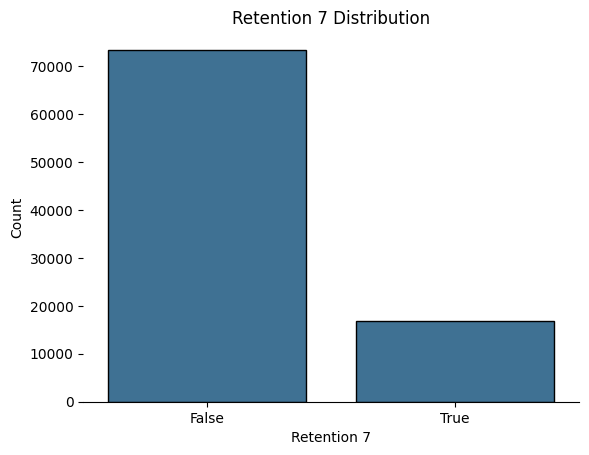

In [15]:
features_to_remove = []
for feature in categorical_features:
    if feature not in features_to_remove:
        print(f"{feature}:")
        print(f" - Most often value: {df[feature].mode()[0]}")
        print(f" - Value count: {df[feature].count()}")
        plot_categorical_distribution(df, feature)

Group Counts:
- A similar number of users for Gate 40 and Gate 30.

Retention 1 Day (Average):
- Slightly higher False.

Retention 7 Days (Average):
- Significantly  higher False.

### Boxplot Analysis of **sum_gamerounds** by Various Features

Features Analyzed:
- **Version**: Compares the distribution of game rounds between the two versions (gate_30 and gate_40) of the game.
- **Retention_1**: Analyzes how the game rounds differ between users who returned on day 1 (retention_1) versus those who did not.
- **Retention_7**: Examines the game round distribution for users who returned on day 7 (retention_7) compared to those who did not.

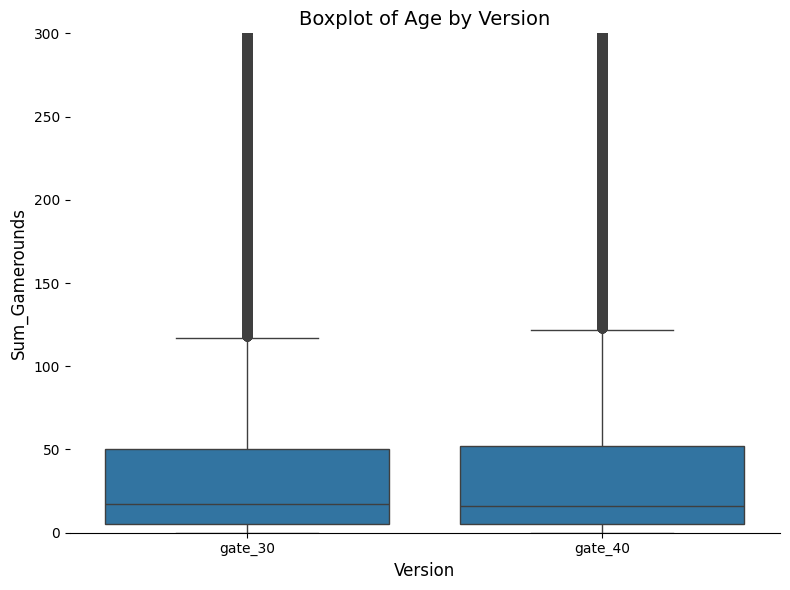

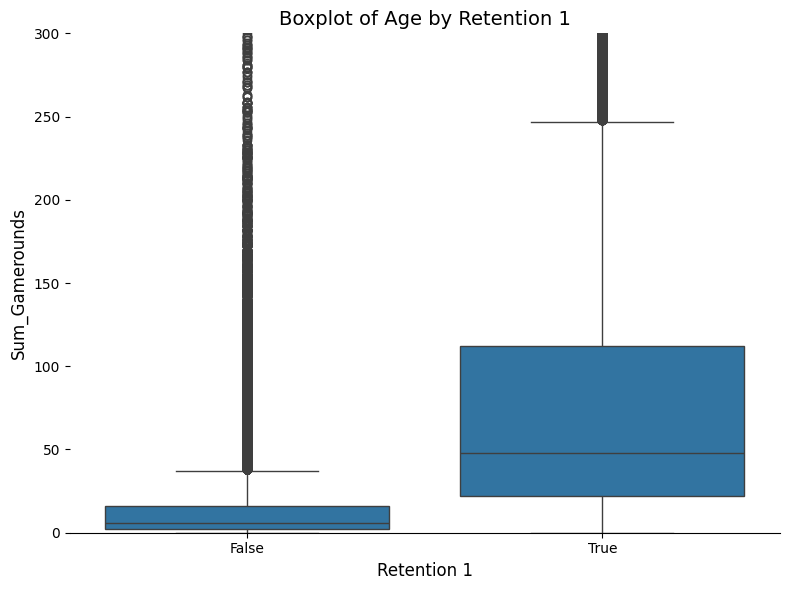

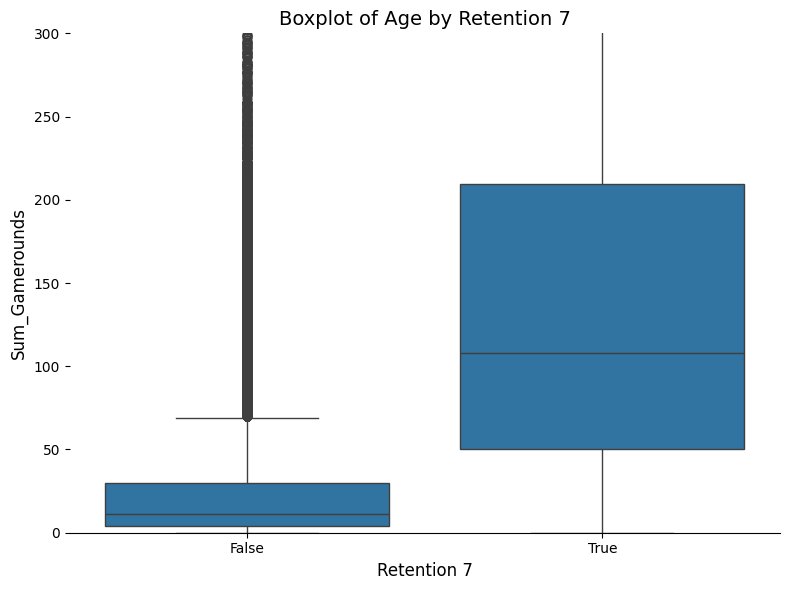

In [16]:
numeric_feature = "sum_gamerounds"
features_for_boxplot_with_age = ["version", "retention_1", "retention_7"]

for feature in features_for_boxplot_with_age:
    plot_box_with_category(df, numeric_feature, feature, ylim=(0, 300))

Version (Gate 30 vs. Gate 40):
- The distribution of **sum_gamerounds** is **equally distributed** across both versions (Gate 30 and Gate 40). This suggests that the game rounds played by users in each group are relatively similar, indicating that the grouping of users based on the version does not significantly impact their total game rounds.

Retention 1 Day:
- **Gate 30 (False retention)**: The majority of users in the "False" group have a relatively **narrow range** of game rounds played (0 to 40). This suggests that most of the users who did not return on the 1st day played only a small number of game rounds.
- **Gate 30 (True retention)**: The **"True" retention** group shows a much **wider range** (0 to 250 game rounds), indicating that users who returned on the 1st day played many more rounds than those who did not return.
- There is a **significant difference** between the two retention groups, suggesting that **day 1 retention is strongly related to the number of game rounds played** on that day.

Retention 7 Days:
- **Gate 30 (False retention)**: Similar to the 1-day retention, users who did not return after 7 days have a **narrower range** of game rounds (0 to 60).
- **Gate 30 (True retention)**: The **"True" retention** group again shows a **wider range** of game rounds (0 to 250), indicating that users who returned after 7 days also tend to play significantly more rounds.
- The **differences between the retention groups** are also prominent, reinforcing the relationship between long-term retention and the amount of gameplay.

Conclusion:
- **Retention behavior** appears strongly tied to the number of game rounds played, with users who play more rounds being more likely to return on day 1 and after 7 days.
- The **distribution of game rounds** for both retention groups (True vs False) is substantially different, indicating a potential area of focus for improving retention: encouraging players to play more rounds in the early stages of the game may lead to better long-term retention.


### Aggregate key statistics

In [17]:
sample_size = df.shape[0]
group_counts = df["version"].value_counts()
retention_1_avg = df.groupby("version")["retention_1"].mean()
retention_7_avg = df.groupby("version")["retention_7"].mean()
game_rounds_avg = df.groupby("version")["sum_gamerounds"].mean()

print(f"Sample size: {sample_size}")
print(f"\nGroup counts:\n{group_counts}")
print(f"\nRetention 1 Day (Average):\n{retention_1_avg}")
print(f"\nRetention 7 Days (Average):\n{retention_7_avg}")
print(f"\nGame Rounds Played (Average):\n{game_rounds_avg}")

Sample size: 90188

Group counts:
version
gate_40    45489
gate_30    44699
Name: count, dtype: int64

Retention 1 Day (Average):
version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

Retention 7 Days (Average):
version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

Game Rounds Played (Average):
version
gate_30    51.342111
gate_40    51.298776
Name: sum_gamerounds, dtype: float64


<a id="ab_chi2"></a>
## 3. A/B Test: Evaluating the Effectiveness of Game Versions on Retention Time

<a id="chi2"></a>
## 3.1. Chi-Square Test (`chi2_contingency`)

The `chi2_contingency` test is a statistical test used to determine whether there is a significant association between two categorical variables in a contingency table. It compares the observed frequencies of categories in the table with the expected frequencies, assuming the null hypothesis of no association between the variables.

The `chi2_contingency` test used when:
- The data is categorical (e.g., `True/False`, `Yes/No`).
- We are analyzing relationships between two categorical variables (e.g., treatment group vs. retention outcome).
- The goal is to test whether the variables are independent (null hypothesis) or associated (alternative hypothesis).

Target Metric:
- **Retention rates for 1-day and 7-day (proportion)**: Indicators of long-term player engagement.

<a id="chi2_assumptions"></a>
## 3.2. Assumptions for Chi-squared Test

1. **Expected Frequencies Should Not Be Too Small**:
   - Each cell in the contingency table should have an expected frequency of at least 5. This can be checked using the expected frequency matrix returned by the `chi2_contingency` function.

2. **Independence of Observations**:
   - Each observation should be independent of the others, meaning:
     - No individual can appear in more than one category or group.
     - There should be no overlap or duplication in the data.

3. **Sufficiently Large Sample Size**:
   - The chi-square test performs best with larger sample sizes, as small samples may lead to unreliable results. For smaller sample sizes, Fisher's Exact Test is preferred.

In [18]:
retention_1_table = pd.crosstab(df["version"], df["retention_1"])
retention_7_table = pd.crosstab(df["version"], df["retention_7"])

chi2_1, p_1, _, expected_1 = chi2_contingency(retention_1_table)
chi2_7, p_7, _, expected_7 = chi2_contingency(retention_7_table)
print("1. Expected Frequencies for retention_1:")
print(expected_1)

print("\n1. Expected Frequencies for retention_7:")
print(expected_7)

total_sample_size_retention_1 = retention_1_table.values.sum()
total_sample_size_retention_7 = retention_7_table.values.sum()

print("\n3. Sample Size for retention_1", total_sample_size_retention_1)
print("3. Sample Size for retention_7", total_sample_size_retention_7)

1. Expected Frequencies for retention_1:
[[24798.35970417 19900.64029583]
 [25236.64029583 20252.35970417]]

1. Expected Frequencies for retention_7:
[[36382.49203885  8316.50796115]
 [37025.50796115  8463.49203885]]

3. Sample Size for retention_1 90188
3. Sample Size for retention_7 90188


Before conducting the Chi-squared test, we need to ensure that the following assumptions are met:

1. **Expected Frequency**
- Since all expected frequencies are much larger than 5, this assumption is satisfied.
2. **Independence of Observations**
- The observations should be independent. Every used have id all users are unique in this dataset This means that each player should only belong to one group (either `gate_30` or `gate_40`).
3. **Sample Size**
- Both sample sizes are sufficiently large with 90188 values, meeting the requirement for conducting the Chi-squared test.


<a id="chi2_results"></a>
## 3.3. Results for Chi-squared Test

In [19]:
print(f"\nChi-squared test for Retention 1 Day: chi2={chi2_1:.4f}, p={p_1:.4f}")
print(f"Chi-squared test for Retention 7 Days: chi2={chi2_7:.4f}, p={p_7:.4f}")
print(f"\nRetention 1 Day (Average):\n{retention_1_avg}")
print(f"\nRetention 7 Days (Average):\n{retention_7_avg}")


Chi-squared test for Retention 1 Day: chi2=3.1698, p=0.0750
Chi-squared test for Retention 7 Days: chi2=9.9153, p=0.0016

Retention 1 Day (Average):
version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

Retention 7 Days (Average):
version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64


Results Interpretation:

1. **Chi-squared Test for Retention 1 Day**
    - **Chi-squared statistic**: `chi2 = 3.17`
    - **P-value**: `p = 0.0750`

    - The **Chi-squared statistic** of 3.17 indicates a modest deviation between the observed and expected frequencies of players retained on day 1.
    - The **p-value** of 0.0750 is **greater than 0.05**, which means that we **fail to reject the null hypothesis** at the 5% significance level.
    - **Conclusion**: There is **not enough evidence** to suggest that the change from `gate_30` to `gate_40` has a statistically significant effect on player retention after 1 day. Therefore, we conclude that the gate change likely does not influence day 1 retention.

2. **Chi-squared Test for Retention 7 Days**
    - **Chi-squared statistic**: `chi2 = 9.92`
    - **P-value**: `p = 0.00164`

    - The **Chi-squared statistic** of 9.92 indicates a significant deviation between the observed and expected frequencies of players retained on day 7.
    - The **p-value** of 0.00164 is **less than 0.05**, meaning we **reject the null hypothesis** at the 5% significance level.
    - **Conclusion**: There is **sufficient evidence** to suggest that the change from `gate_30` to `gate_40` has a statistically significant effect on player retention after 7 days. Therefore, we conclude that the gate change likely influences long-term retention (7 days).


Findings for **Retention 1 Days**: 
- Suggest that the gate change does not impact short-term retention (1 day).

Findings for **Retention 7 Days**:
- The results show that **Retention 7 Days** is significantly lower for players in the `gate_40` group compared to the `gate_30` group. 
- Since the players in `gate_40` have a lower retention rate 18.2% when `gate_30` 19.0%, **moving the gate from level 30 to level 40 appears to have a negative impact on long-term retention**.

<a id="chi2_ci_a"></a>
## 3.4. Confidence Interval for Proportions (Analytical Method)

In this section, we calculate the **confidence interval** for the **proportions** of players retained after 1 day and 7 days, for both the `gate_30` and `gate_40` groups. Since we are dealing with proportions (e.g., the proportion of players who return after 1 day or 7 days), we use a **Z-score** to calculate the confidence interval for each group's retention rate.

Use the **Z-score** rather than the **t-score** for the following reasons:

1. **Proportions are Normally Distributed**: When the sample size is large enough (typically \(n > 30\)), the distribution of sample proportions is approximately **normal** due to the Central Limit Theorem (CLT). For sufficiently large sample sizes, the normal distribution can be used to estimate confidence intervals for proportions.

2. **Standard Error of Proportions**: The Z-score is used with proportions because it assumes that the underlying data follows a **binomial distribution**, which, for large sample sizes, can be approximated by a normal distribution.

3. **Large Sample Sizes**: In this case, since we are working with large sample sizes (tens of thousands of players), the **t-distribution** is not necessary. The **t-distribution** is used when the sample size is small and the population standard deviation is unknown. However, with large sample sizes and known proportions, the **Z-distribution** is more appropriate and computationally efficient.

In [20]:
def calc_confidence_interval(p_hat, n, confidence_level=0.95):
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_score * np.sqrt((p_hat * (1 - p_hat)) / n)
    ci_lower = p_hat - margin_of_error
    ci_upper = p_hat + margin_of_error
    return (ci_lower, ci_upper)


p_ret_1_gate_30 = df[df["version"] == "gate_30"]["retention_1"].mean()
p_ret_1_gate_40 = df[df["version"] == "gate_40"]["retention_1"].mean()

n_gate_30_1 = len(df[df["version"] == "gate_30"])
n_gate_40_1 = len(df[df["version"] == "gate_40"])

ci_gate_30_1 = calc_confidence_interval(p_ret_1_gate_30, n_gate_30_1)
ci_gate_40_1 = calc_confidence_interval(p_ret_1_gate_40, n_gate_40_1)

p_ret_7_gate_30 = df[df["version"] == "gate_30"]["retention_7"].mean()
p_ret_7_gate_40 = df[df["version"] == "gate_40"]["retention_7"].mean()

n_gate_30_7 = len(df[df["version"] == "gate_30"])
n_gate_40_7 = len(df[df["version"] == "gate_40"])

ci_gate_30_7 = calc_confidence_interval(p_ret_7_gate_30, n_gate_30_7)
ci_gate_40_7 = calc_confidence_interval(p_ret_7_gate_40, n_gate_40_7)

print(
    f"Confidence Interval for Retention 1 Day (Gate 30): [{ci_gate_30_1[0]:.4f}; {ci_gate_30_1[1]:.4f}]"
)
print(
    f"Confidence Interval for Retention 1 Day (Gate 40): [{ci_gate_40_1[0]:.4f}; {ci_gate_40_1[1]:.4f}]"
)
print(
    f"Confidence Interval for Retention 7 Days (Gate 30): [{ci_gate_30_7[0]:.4f}; {ci_gate_30_7[1]:.4f}]"
)
print(
    f"Confidence Interval for Retention 7 Days (Gate 40): [{ci_gate_40_7[0]:.4f}; {ci_gate_40_7[1]:.4f}]"
)

Confidence Interval for Retention 1 Day (Gate 30): [0.4436; 0.4528]
Confidence Interval for Retention 1 Day (Gate 40): [0.4377; 0.4468]
Confidence Interval for Retention 7 Days (Gate 30): [0.1865; 0.1938]
Confidence Interval for Retention 7 Days (Gate 40): [0.1785; 0.1855]


**Retention 1 Day**

1. **Gate 30**:
   - **Confidence Interval**: [0.4436, 0.4528]
   - This means that we are 95% confident that the true retention rate for players who reach **Gate 30** on **Day 1** lies between **44.36%** and **45.28%**.

2. **Gate 40**:
   - **Confidence Interval**: [0.4377, 0.4468]
   - This means that we are 95% confident that the true retention rate for players who reach **Gate 40** on **Day 1** lies between **43.77%** and **44.68%**.

**Retention 7 Days**

1. **Gate 30**:
   - **Confidence Interval**: [0.1865, 0.1938]
   - This means that we are 95% confident that the true retention rate for players who reach **Gate 30** on **Day 7** lies between **18.65%** and **19.38%**.

2. **Gate 40**:
   - **Confidence Interval**: [0.1785, 0.1855]
   - This means that we are 95% confident that the true retention rate for players who reach **Gate 40** on **Day 7** lies between **17.85%** and **18.55%**.

**Key Insights from Confidence Intervals**:

- The retention rate for **Day 1** is higher for **Gate 30** than for **Gate 40**, as the confidence intervals for **Gate 30** [0.4436, 0.4528] are slightly higher than those for **Gate 40** [0.4377, 0.4468].
  
- Similarly, the retention rate for **Day 7** is also higher for **Gate 30** than for **Gate 40**, as the confidence interval for **Gate 30** [0.1865, 0.1938] is higher than for **Gate 40** [0.1785, 0.1855]. But more importantly confidence interval do not overlap from **Gate 30** and **Gate 40**.

**Conclusion**:

- Based on the confidence intervals, it appears that **Gate 30** has slightly better retention rates both on **Day 1** and **Day 7** compared to **Gate 40**, as evidenced by the higher confidence intervals for **Gate 30** across both metrics.

<a id="chi2_ci_b"></a>
## 3.5. Confidence Interval for Proportions (Bootstrap Method)

The **confidence interval** for the **proportions** of players retained after **1 day** and **7 days** for both `Gate 30` and `Gate 40` groups using the **bootstrap method**. The bootstrap method is a **resampling technique** that allows to estimate the sampling distribution of a statistic (like a proportion) by repeatedly sampling with replacement from the data.

Why Use Bootstrap?

- **Non-parametric Approach**: The bootstrap method does not rely on assumptions about the underlying distribution of the data, such as normality. This is particularly useful when the data is not normally distributed or when sample sizes are not large enough to assume a normal distribution.
  
- **Estimation with Resampling**: By generating many resamples of the data and calculating the statistic (retention rate) for each resample, we can obtain a distribution of the statistic. This distribution allows to estimate the **confidence interval**.

### Steps for Bootstrap Confidence Interval for Proportions

1. **Resampling**: 
   - We randomly sample with replacement from the observed data (i.e., the retention data for each group). Each resample is of the same size as the original data.
   
2. **Calculating Proportions**: 
   - For each resample, we calculate the **proportion of players retained** (for both Day 1 and Day 7) for the group (either `Gate 30` or `Gate 40`).

3. **Generating Bootstrap Samples**: 
   - This resampling process is repeated **N times** (e.g., 1000 or 5,000 times) to create a distribution of retention proportions for each group.

4. **Calculating the Confidence Interval**:
   - Once we have the distribution of proportions from the resampling process, we can calculate the **confidence interval**. Typically, we use the **percentile method** to calculate the lower and upper bounds of the confidence interval. The **lower bound** is the 2.5th percentile and the **upper bound** is the 97.5th percentile of the bootstrap distribution.

In [21]:
def bootstrap_ci(data, num_resamples=5000, confidence_level=0.95):
    resamples = np.random.choice(data, (num_resamples, len(data)), replace=True)
    resample_means = np.mean(resamples, axis=1)
    lower = np.percentile(resample_means, (1 - confidence_level) / 2 * 100)
    upper = np.percentile(resample_means, (1 + confidence_level) / 2 * 100)
    return resample_means, (lower, upper)


resample_means_gate_30_1, bootstrap_ci_gate_30_1 = bootstrap_ci(
    df[df["version"] == "gate_30"]["retention_1"]
)
resample_means_gate_40_1, bootstrap_ci_gate_40_1 = bootstrap_ci(
    df[df["version"] == "gate_40"]["retention_1"]
)
resample_means_gate_30_7, bootstrap_ci_gate_30_7 = bootstrap_ci(
    df[df["version"] == "gate_30"]["retention_7"]
)
resample_means_gate_40_7, bootstrap_ci_gate_40_7 = bootstrap_ci(
    df[df["version"] == "gate_40"]["retention_7"]
)

print(
    f"Bootstrap Confidence Interval for Retention 1 Day (Gate 30): [{bootstrap_ci_gate_30_1[0]:.4f}; {bootstrap_ci_gate_30_1[1]:.4f}]"
)
print(
    f"Bootstrap Confidence Interval for Retention 1 Day (Gate 40): [{bootstrap_ci_gate_40_1[0]:.4f}; {bootstrap_ci_gate_40_1[1]:.4f}]"
)
print(
    f"Bootstrap Confidence Interval for Retention 7 Days (Gate 30): [{bootstrap_ci_gate_30_7[0]:.4f}; {bootstrap_ci_gate_30_7[1]:.4f}]"
)
print(
    f"Bootstrap Confidence Interval for Retention 7 Days (Gate 40): [{bootstrap_ci_gate_40_7[0]:.4f}; {bootstrap_ci_gate_40_7[1]:.4f}]"
)

Bootstrap Confidence Interval for Retention 1 Day (Gate 30): [0.4436; 0.4530]
Bootstrap Confidence Interval for Retention 1 Day (Gate 40): [0.4377; 0.4468]
Bootstrap Confidence Interval for Retention 7 Days (Gate 30): [0.1866; 0.1938]
Bootstrap Confidence Interval for Retention 7 Days (Gate 40): [0.1786; 0.1856]


**Retention 1 Day**

1. **Gate 30**:
   - **Bootstrap Confidence Interval**: [0.4438, 0.4527]
   - This means that, based on the bootstrap method, we are 95% confident that the true retention rate for players who reach **Gate 30** on **Day 1** lies between **44.38%** and **45.27%**.

2. **Gate 40**:
   - **Bootstrap Confidence Interval**: [0.4378, 0.4467]
   - This means that we are 95% confident that the true retention rate for players who reach **Gate 40** on **Day 1** lies between **43.78%** and **44.67%**.

**Retention 7 Days**

1. **Gate 30**:
   - **Bootstrap Confidence Interval**: [0.1865, 0.1938]
   - This means that, based on the bootstrap method, we are 95% confident that the true retention rate for players who reach **Gate 30** on **Day 7** lies between **18.65%** and **19.38%**.

2. **Gate 40**:
   - **Bootstrap Confidence Interval**: [0.1785, 0.1856]
   - This means that, based on the bootstrap method, we are 95% confident that the true retention rate for players who reach **Gate 40** on **Day 7** lies between **17.85%** and **18.56%**.

**Key Insights from Bootstrap Confidence Intervals**:

- The retention rate for **Day 1** is higher for **Gate 30** than for **Gate 40**. The confidence intervals for **Gate 30** [0.4438, 0.4527] are slightly higher than for **Gate 40** [0.4378, 0.4467].
  
- For **Day 7**, the retention rate is also higher for **Gate 30** compared to **Gate 40**. The confidence interval for **Gate 30** [0.1865, 0.1938] is higher than for **Gate 40** [0.1785, 0.1856].

- **Key Difference on Day 7**: 
   - The **confidence intervals for retention on Day 7** for **Gate 30** and **Gate 40** do **not overlap**. 
   - This suggests that there is a statistically significant difference in retention between the two gates on **Day 7**. Players who reach **Gate 30** tend to have higher retention rates compared to players who reach **Gate 40** after 7 days.

### Plotting the Distribution of Retention 1 and 7 Sample Means for Bootstrap

In this step, we visualize the distribution of **Retention 1 Sample Means** for **Gate 30** and **Gate 40**, which were generated using bootstrap resampling. The `plot_two_numeric_distributions` function was used to compare how retention rates differ between the two groups. Each distribution is represented by a histogram along with a Kernel Density Estimate (KDE) curve.

#### Parameters Used:
- **`resample_means_gate_30_1`**: The bootstrap resample means for **Gate 30**.
- **`resample_means_gate_40_1`**: The bootstrap resample means for **Gate 40**.
- **`bins=50`**: The number of bins used for the histogram, set to 50 to capture more detail of the distribution.
- **`color_gate_30='royalblue'`**: The color used for the **Gate 30** distribution is set to **royal blue** for clarity.
- **`color_gate_40='darkorange'`**: The color for the **Gate 40** distribution is set to **dark orange** to create contrast.
- **`title='Retention 1 Sample Means for Bootstrap'`**: The plot title reflects that it visualizes the retention rates for **Gate 30** and **Gate 40** using bootstrap sampling.
- **`x_axis_name='Retention Rate'`**: The x-axis represents **retention rate** values, displaying how they are distributed for both gates.

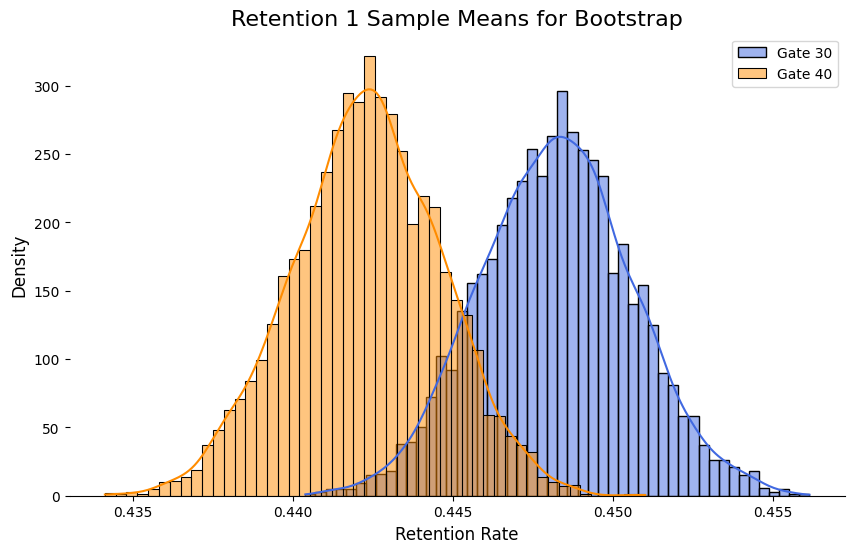

In [22]:
plot_two_numeric_distributions(
    resample_means_gate_30_1,
    resample_means_gate_40_1,
    bins=50,
    color_gate_30="royalblue",
    color_gate_40="darkorange",
    title="Retention 1 Sample Means for Bootstrap",
    x_axis_name="Retention Rate",
    labels=("Gate 30", "Gate 40"),
)

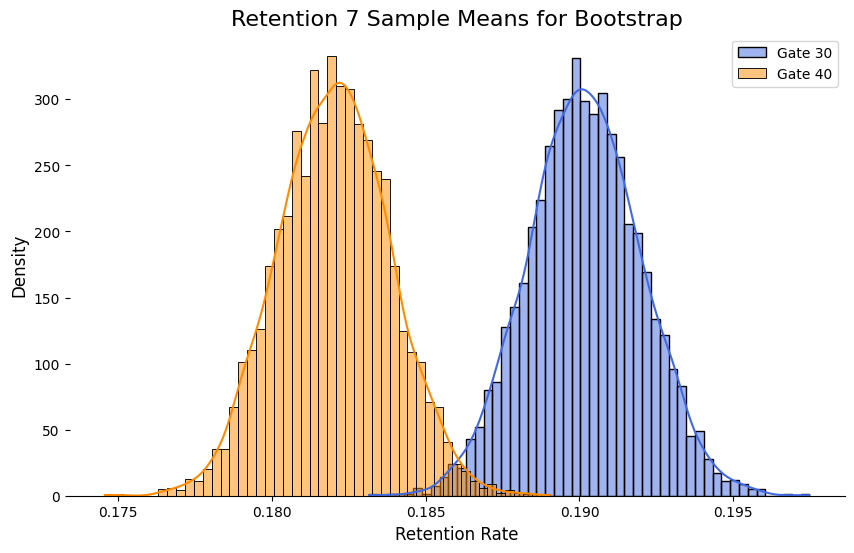

In [23]:
plot_two_numeric_distributions(
    resample_means_gate_30_7,
    resample_means_gate_40_7,
    bins=50,
    color_gate_30="royalblue",
    color_gate_40="darkorange",
    title="Retention 7 Sample Means for Bootstrap",
    x_axis_name="Retention Rate",
    labels=("Gate 30", "Gate 40"),
)

From the visual comparison of **Retention 1** and **Retention 7** sample means for **Gate 30** and **Gate 40**, we observe that:

- The **Retention 1** distributions for **Gate 30** and **Gate 40** show a significant overlap, indicating that the retention rates for both gates are quite similar.
- On the other hand, the **Retention 7** distributions for the two gates show less overlap, which suggests there is a more noticeable difference between **Gate 30** and **Gate 40** in terms of retention over a 7-day period.


<a id="ab_ttest"></a>
## 4. A/B Test: Evaluating the Effectiveness of Game Versions on Sum of Gamerounds

<a id="ttest"></a>
## 4.1. t-Test 
In this section, we are comparing the total number of game rounds played by players in two groups of the Cookie Cats game:
- **gate_30** (control group) - The first gate appears at level 30.
- **gate_40** (treatment group) - The first gate appears at level 40.

Our goal is to determine if the mean number of game rounds played differs significantly between these two groups.

Statistical Test: Two-Sample t-Test

A **two-sample t-test** (also known as an independent t-test) is used to compare the means of two independent groups. In our case, the groups are:
- Players who encountered the gate at level 30 (`gate_30`).
- Players who encountered the gate at level 40 (`gate_40`).

Target Metric:
- **Sum of game rounds played**: A measure of player engagement.

<a id="ttest_assumptions"></a>
## 4.2. Assumptions of the t-Test:

1. **Independence**: The two groups should be independent of each other (i.e., no overlap of players between the groups). In this A/B test, players are randomly assigned to one of the two groups, so this assumption is satisfied.

2. **Normality**: The data should be approximately normally distributed. 

3. **Equal Variances (Homogeneity of Variance)**: The two groups should have roughly equal variances. We tested this assumption using **Levene’s test** for homogeneity of variances, and the result indicated that the variances are equal (p-value > 0.05). Therefore, we can proceed with the standard two-sample t-test.



In [24]:
gate_30_rounds = df[df["version"] == "gate_30"]["sum_gamerounds"]
gate_40_rounds = df[df["version"] == "gate_40"]["sum_gamerounds"]

stat, p_value_levene = levene(gate_30_rounds, gate_40_rounds)

print(f"Test Statistic (Levene’s)={stat:.4f}, p-value={p_value_levene:.4f}")

Test Statistic (Levene’s)=0.0751, p-value=0.7840


Assumptions and Results for t-Test Analysis:

1. Assumption 1: **Independence of Samples**

Assume that the two groups (gate_30 and gate_40) are independent of each other. This means that there is no overlap of players between the two groups. 

- **User ID’s are unique** in the dataset, ensuring that each player is only assigned to one group (either gate_30 or gate_40).

2. Assumption 2: **Normality**

For the two-sample t-test to be valid, the data for both groups should be approximately normally distributed. However, given the large sample size (n > 30), we can apply the **Central Limit Theorem (CLT)**, which states that the sampling distribution of the mean will tend to be normal regardless of the distribution of the data, as long as the sample size is sufficiently large.

- The **distribution of sum_gamerounds** is **exponentially distributed**, which is not normal.
- However, since the sample size is large (n > 30), we can relax the requirement of normality based on the **Central Limit Theorem**.

3. Assumption 3: **Homogeneity of Variance (Equal Variance)**
- **Test Statistic (Levene’s)**: 0.0751
- **p-value**: 0.7840

Since the **p-value** is **greater than 0.05**, we **fail to reject the null hypothesis** of equal variances. This indicates that the variances of the two groups (gate_30 and gate_40) are not significantly different, satisfying the assumption of **homogeneity of variance**.

Conclusion:

- The assumption of **independence** is satisfied because the user IDs are unique and there is no overlap between the groups.
- The assumption of **normality** is relaxed due to the large sample size, supported by the **Central Limit Theorem**.
- The assumption of **equal variances** is met, as Levene’s test results show no significant difference in variances between the two groups (p-value = 0.7840).

With these assumptions validated, we can proceed confidently with the two-sample t-test for comparing the **sum_gamerounds** between the two groups.

<a id="ttest_results"></a>
## 4.3. Two-Sample t-Test for Game Rounds Played

t-Test Overview:

The purpose of the t-test is to determine if there is a statistically significant difference in the average number of game rounds played between the two groups.

- Null Hypothesis (H₀):
    - There is no difference in the mean number of game rounds played between the two groups.

- Alternative Hypothesis (H₁):
    - There is a significant difference in the mean number of game rounds played between the two groups.

Parameters Used in the t-Test

We used the **`ttest_ind()`** function from the **SciPy library** to perform the t-test. Here are the key parameters used in the function:

**`ttest_ind()` Parameters:**
1. **`gate_30_rounds`**: The data for the control group (gate_30). This contains the number of game rounds played by players in the gate_30 group.
2. **`gate_40_rounds`**: The data for the treatment group (gate_40). This contains the number of game rounds played by players in the gate_40 group.
3. **`equal_var=True`**: This parameter specifies whether the t-test should assume **equal variances** between the two groups:
   - **`equal_var=True`**: Assumes equal variances (standard two-sample t-test). Pooled variance.
   - **`equal_var=False`**: Does not assume equal variances (Welch's t-test), used when the homogeneity of variance assumption is violated. Not pooled variance.
   
   Based on the results from **Levene’s test for homogeneity of variance**, where the p-value was greater than 0.05, we assumed equal variances and set `equal_var=True`.

Output:
- **`t_stat`**: The t-statistic is the test statistic that measures the difference between the means of the two groups in terms of the standard error. A large t-statistic (in absolute value) suggests a significant difference between the groups.
- **`p_value`**: The p-value is the probability of obtaining the observed difference in means (or a more extreme value) under the null hypothesis (no difference). If the p-value is less than 0.05, we reject the null hypothesis and conclude that the difference is statistically significant.

In [25]:
t_stat, p_value = ttest_ind(gate_30_rounds, gate_40_rounds, equal_var=True)

print(f"T-test for Game Rounds Played: t_stat={t_stat:.4f}, p_value={p_value:.4f}")

T-test for Game Rounds Played: t_stat=0.0634, p_value=0.9495


T-Test Results for Game Rounds Played:

- **t-statistic**: 0.0634
- **p-value**: 0.9495

Interpretation:
- The **t-statistic** is 0.0634, which is very close to zero. This suggests that the difference in the mean number of game rounds between the two groups is very small in relation to the variability within each group.
- The **p-value** is 0.9495, which is much greater than the typical significance level of 0.05. Since the **p-value** is much greater than the significance threshold of 0.05, we **fail to reject the null hypothesis**. This means that there is no statistically significant difference in the average number of game rounds played between the two groups (gate_30 and gate_40).

<a id="ttest_ci_a"></a>
## 4.4. Analytical Confidence Interval Calculation

Confidence interval:
- The **analytical confidence interval** provides a rigorous and well-established method for estimating the range of the true population mean difference.
- Using the **t-distribution** is appropriate here because we are comparing the means of two independent groups, and the sample sizes are large enough to rely on the Central Limit Theorem (CLT) to approximate the sampling distribution as normal.
- By using the **t-statistic**, we account for the sample size and variability, ensuring that our confidence interval is accurate even if the data distribution is not perfectly normal.

Calculate the sample means and standard deviations:
   - For each group (`gate_30` and `gate_40`), we first calculate the **mean** (average) number of game rounds played, and the **sample standard deviation**. The sample standard deviation is used to measure the spread or variability of the data around the mean.

In [26]:
mean_30 = np.mean(gate_30_rounds)
mean_40 = np.mean(gate_40_rounds)
std_30 = np.std(gate_30_rounds, ddof=1)
std_40 = np.std(gate_40_rounds, ddof=1)
n_30 = len(gate_30_rounds)
n_40 = len(gate_40_rounds)

se = np.sqrt((std_30**2 / n_30) + (std_40**2 / n_40))

t_critical = stats.t.ppf(1 - 0.025, df=min(n_30, n_40) - 1)

mean_diff = mean_30 - mean_40
ci_lower = mean_diff - t_critical * se
ci_upper = mean_diff + t_critical * se

print(
    f"The analytical confidence interval for the mean difference in game rounds played between the gate_30 and gate_40 groups is [{ci_lower:.4f}; {ci_upper:.4f}]"
)

The analytical confidence interval for the mean difference in game rounds played between the gate_30 and gate_40 groups is [-1.2969; 1.3836]


This interval means that, with 95% confidence, the true difference in the mean number of game rounds played between the two groups lies between **-1.2969** and **1.3836**.

- If the confidence interval includes zero, as in this case, it suggests that there is no statistically significant difference in the mean number of game rounds played between the two groups. This is consistent with the results from the t-test, where we failed to reject the null hypothesis.
  
- The interval suggests that the difference in means could be slightly negative, indicating that players in the **gate_30** group might play fewer rounds, or slightly positive, indicating that players in the **gate_40** group might play more rounds. However, since zero is within the interval, we cannot make a definitive conclusion about the direction of the effect.


<a id="ttest_ci_b"></a>
## 4.5. Bootstrap Confidence Interval Calculation

In this step, we calculate the **bootstrap confidence interval (CI)** for the mean difference in game rounds played between the **gate_30** and **gate_40** groups. The **bootstrap method** is a powerful resampling technique used to estimate the distribution of a statistic by repeatedly sampling with replacement from the observed data.

1. Resampling with replacement
   - To compute the bootstrap confidence interval, we **resample the data** with replacement. This means that for each iteration, we randomly select values from each group (`gate_30` and `gate_40`) to create new bootstrap samples. The key point here is that we allow for the possibility of sampling the same data point multiple times, which simulates the process of drawing new samples from the population.
   - This is done for a specified number of iterations (e.g., 5000) to create a distribution of the difference in means between the two groups based on resampled data.

2. Calculate the difference in means for each resample
   - For each resampled pair of samples (`sample_30` and `sample_40`), we compute the **mean difference** between the two groups. This gives us a new value of the difference in means each time we resample the data.

3. Determine the percentiles
   - Once we have the distribution of the mean differences from the resampled data, we calculate the **confidence interval** by determining the appropriate percentiles of this distribution.
   - For a 95% confidence interval (with alpha = 0.05), we compute the **lower bound** as the 2.5th percentile and the **upper bound** as the 97.5th percentile. These percentiles represent the range within which we expect the true population difference in means to lie, with 95% confidence.

bootstrap method for CI:

- **No assumptions about the data distribution**: Unlike traditional parametric methods (such as the t-test), the bootstrap method does not rely on assumptions about the underlying distribution of the data (e.g., normality). This makes it especially useful when the data may not follow a normal distribution or when the sample size is small.
  
- **Flexibility**: The bootstrap method allows us to estimate the confidence interval directly from the data without needing to rely on complex mathematical formulas or approximations.

- **Robustness**: The bootstrap method is particularly useful in situations where other methods may not be reliable, such as when dealing with skewed distributions or small sample sizes.

In [27]:
def bootstrap_ci(data1, data2, n_iterations=5000, alpha=0.05):
    means_diff = []
    for _ in range(n_iterations):
        sample_30 = np.random.choice(data1, size=len(data1), replace=True)
        sample_40 = np.random.choice(data2, size=len(data2), replace=True)
        means_diff.append(np.mean(sample_30) - np.mean(sample_40))

    lower_bound = np.percentile(means_diff, 100 * alpha / 2)
    upper_bound = np.percentile(means_diff, 100 * (1 - alpha / 2))

    return means_diff, lower_bound, upper_bound


means_diff, bootstrap_lower, bootstrap_upper = bootstrap_ci(
    gate_30_rounds, gate_40_rounds
)
print(
    f"The bootstrap confidence interval for the mean difference in game rounds played between the gate_30 and gate_40 groups is [{bootstrap_lower:.4f}; {bootstrap_upper:.4f}]"
)

The bootstrap confidence interval for the mean difference in game rounds played between the gate_30 and gate_40 groups is [-1.2632; 1.4049]


The **bootstrap confidence interval** for the mean difference in game rounds played between the **gate_30** and **gate_40** groups is: [-1.2815, 1.4158]

1. Range of Mean Difference:
   - The confidence interval suggests that the true difference in the mean number of game rounds played between the two groups could fall between **-1.2815** and **1.4158**.
   
2. Zero in the Interval:
   - Since **zero is within the interval**, this implies that the true mean difference could be **zero**. In other words, there is a possibility that there is no significant difference in the number of game rounds played between the two groups. This is consistent with the results from the t-test, where we failed to reject the null hypothesis.

3. Interpretation of the Interval Bounds:
   - The lower bound of the interval is **-1.2815**, indicating that, in some resamples, the mean difference could be slightly negative (i.e., players in the **gate_30** group play fewer rounds).
   - The upper bound of the interval is **1.4158**, suggesting that, in other resamples, the **gate_40** group might play more rounds on average than the **gate_30** group.
   
4. No Clear Conclusion About Direction:
   - Since the confidence interval includes both negative and positive values, we cannot draw a clear conclusion about which group (gate_30 or gate_40) plays more rounds. The results suggest that any observed difference in means could be very small or potentially even null.

Conclusion:
Given that the bootstrap confidence interval includes zero and spans both negative and positive values, we can conclude that there is **no clear evidence of a significant difference** in the number of game rounds played between the **gate_30** and **gate_40** groups. The effect, if it exists, could be small or negligible.


### The bootstraped mean difference distribution between the gate_30 and gate_40 

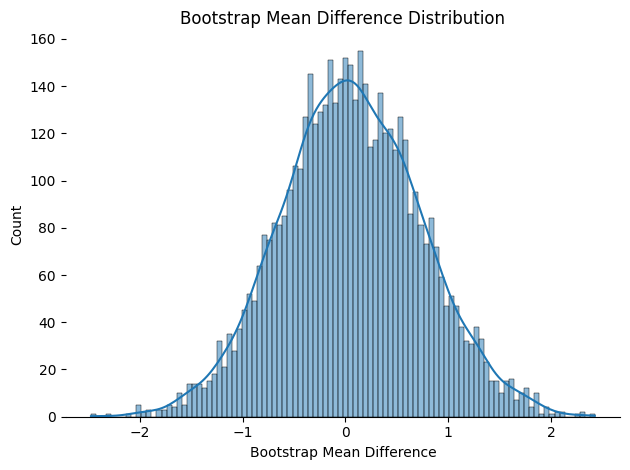

In [28]:
column_name = "bootstrap_mean_difference"
df_means_diff = pd.DataFrame(means_diff, columns=[column_name])
plot_numeric_distribution(df_means_diff, column_name, bins=100)

The bootstrap mean difference distribution between the **gate_30** and **gate_40** groups exhibits a normal distribution shape, with the peak centered approximately around **0**. This suggests that the differences in means between the two groups are symmetrically distributed and no difference between groups.


Both the **analytical** and **bootstrap** confidence intervals provide consistent results, showing that there is no strong evidence of a significant difference in the number of game rounds played between the **gate_30** and **gate_40** groups. In both cases, the intervals include zero, indicating that the true difference in means could be very small or even zero, leading us to conclude that moving the gate from level 30 to level 40 does not have a meaningful effect on player engagement in terms of the number of game rounds played.

<a id="conclusion"></a>
# 5. Conclusion

Based on the analysis of the dataset:

1. **Outlier Handling**: One extreme outlier in the `sum_gamerounds` column was identified and removed to ensure the reliability of the analysis.

2. **Retention and Gameplay Relationship**: 
   - A relationship was observed between **retention on Day 1** and the total number of game rounds played.
   - A similar relationship was found for **retention on Day 7** and the total number of game rounds played.

3. **Chi-Square Tests**: 
   - The Chi-Square test for **Retention 1 Day** revealed no significant difference between the **gate_30** and **gate_40** groups.
   - For **Retention 7 Days**, the Chi-Square test showed a significant difference, but the results suggested that the **gate_40** version might negatively affect retention.

4. **t-Test on Gameplay**:
   - The independent t-test for **sum_gamerounds** found no significant difference between the **gate_30** and **gate_40** groups.

### Recommendation:

The statistical results do not support a strong case for switching to the **gate_40** version, as it does not show significant advantages in terms of retention on Day 1 or gameplay performance. Additionally, the observed negative effect on retention on Day 7 raises concerns about adopting this version. Based on the analysis, it is recommended to retain the **gate_30** version until further tests or optimizations are conducted.
